# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 2.14 s, sys: 8.55 ms, total: 2.15 s
Wall time: 2.16 s
Train ROC-AUC 0.9896
Valid ROC-AUC 0.9165
Test ROC-AUC 0.9129


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [ ]:
results = {}
depths = range(1, 30, 2)

config = {
    'max_depth': 0
}

for depth in depths:
    config['max_depth'] = depth
    boosting = Boosting(config)
    boosting.fit(x_train, y_train, x_valid, y_valid)

    results[depth] = [boosting.score(x_train, y_train), boosting.score(x_test, y_test)]

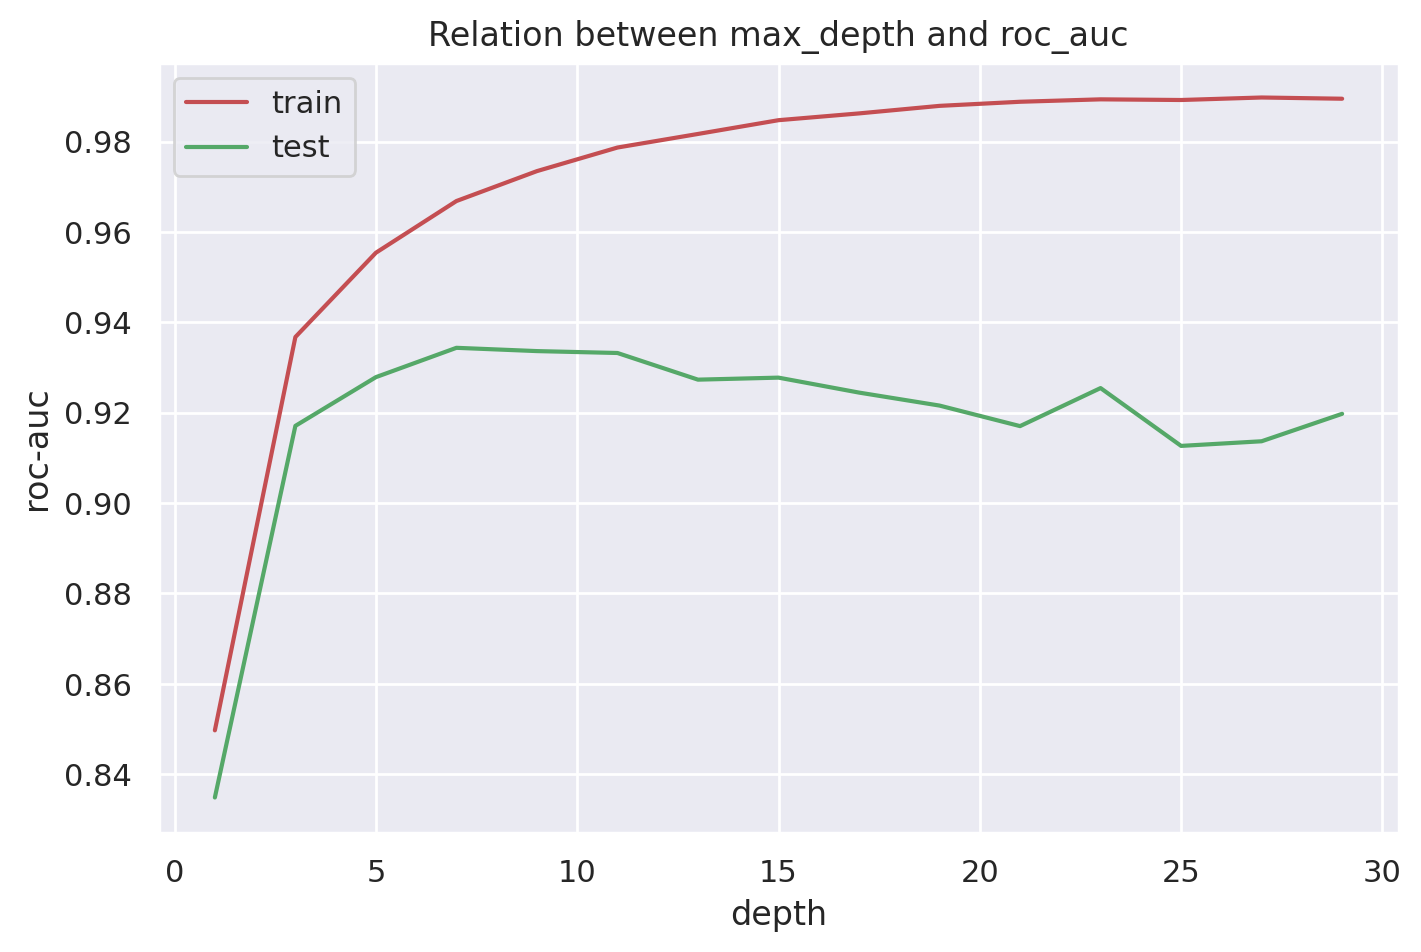

In [ ]:
fig, ax = plt.subplots()
ax.plot(results.keys(), list(map(lambda x: x[0], results.values())), 'r', label='train')
ax.plot(results.keys(), list(map(lambda x: x[1], results.values())), 'g', label='test')

ax.set(xlabel='depth', ylabel='roc-auc',
        title='Relation between max_depth and roc_auc')
plt.legend()
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

`Модель c max_depth=7 имеет наилучшее кач-во. В первую очередь я бы связала это с исследованиями прошлой домашки (мы там выяснили, что глубина должна быть не очень маленькой и не очень большой, 5-12 где-нибудь). Это позволяет дереву не переобучаться под выборку и корректно находить зависимости`

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
%pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
import optuna

def hyper_params(trial):
    # base_model params
    max_depth = trial.suggest_int('max_depth', 4, 12)
    min_samples_leaf = trial.suggest_int('leaves', 1, 7)
    config = {
        'max_depth': max_depth,
        'min_samples_leaf': min_samples_leaf
    }

    # boosting params
    lr = trial.suggest_float('lr', 0, 1)
    n_estimators = trial.suggest_int('n_estimators', 7, 15)
    subsample = trial.suggest_float('subsample', 0, 1)
    esr = trial.suggest_int('esr', 4, 7)

    # training
    b = Boosting(
        base_model_params=config,
        learning_rate=lr,
        n_estimators=n_estimators,
        subsample=subsample,
        early_stopping_rounds=esr
    )
    b.fit(x_train, y_train, x_valid, y_valid)

    return b.score(x_test, y_test)

study = optuna.create_study(direction='maximize')
study.optimize(hyper_params, n_trials=10)
study.best_params

[I 2023-12-21 19:39:07,821] A new study created in memory with name: no-name-46bd3d4a-8651-48fb-83af-8b468515f26e
[I 2023-12-21 19:39:09,753] Trial 0 finished with value: 0.9336522216956401 and parameters: {'max_depth': 10, 'leaves': 2, 'lr': 0.5358579075120777, 'n_estimators': 11, 'subsample': 0.5415267858324814, 'esr': 6}. Best is trial 0 with value: 0.9336522216956401.
[I 2023-12-21 19:39:11,572] Trial 1 finished with value: 0.9321340118370772 and parameters: {'max_depth': 7, 'leaves': 1, 'lr': 0.45041693159523477, 'n_estimators': 9, 'subsample': 0.9719008540494596, 'esr': 7}. Best is trial 0 with value: 0.9336522216956401.
[I 2023-12-21 19:39:14,334] Trial 2 finished with value: 0.9346106974554536 and parameters: {'max_depth': 10, 'leaves': 3, 'lr': 0.1814608287524364, 'n_estimators': 12, 'subsample': 0.8767475100881327, 'esr': 6}. Best is trial 2 with value: 0.9346106974554536.
[I 2023-12-21 19:39:14,844] Trial 3 finished with value: 0.9299824600904076 and parameters: {'max_depth'

{'max_depth': 10,
 'leaves': 3,
 'lr': 0.1814608287524364,
 'n_estimators': 12,
 'subsample': 0.8767475100881327,
 'esr': 6}

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
config = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_leaf': study.best_params['leaves']
}

best_boosting = Boosting(
    base_model_params=config,
    learning_rate=study.best_params['lr'],
    n_estimators=study.best_params['n_estimators'],
    subsample=study.best_params['subsample'],
    early_stopping_rounds=study.best_params['esr']
)
best_boosting.fit(x_train, y_train, x_valid, y_valid)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


lr = LogisticRegression(max_iter=100000).fit(x_train, y_train)
lr_pred = lr.decision_function(x_test)
print("Score =", roc_auc_score(y_test == 1, lr.predict_proba(x_test)[:, 1]))

Score = 0.9378982496303865


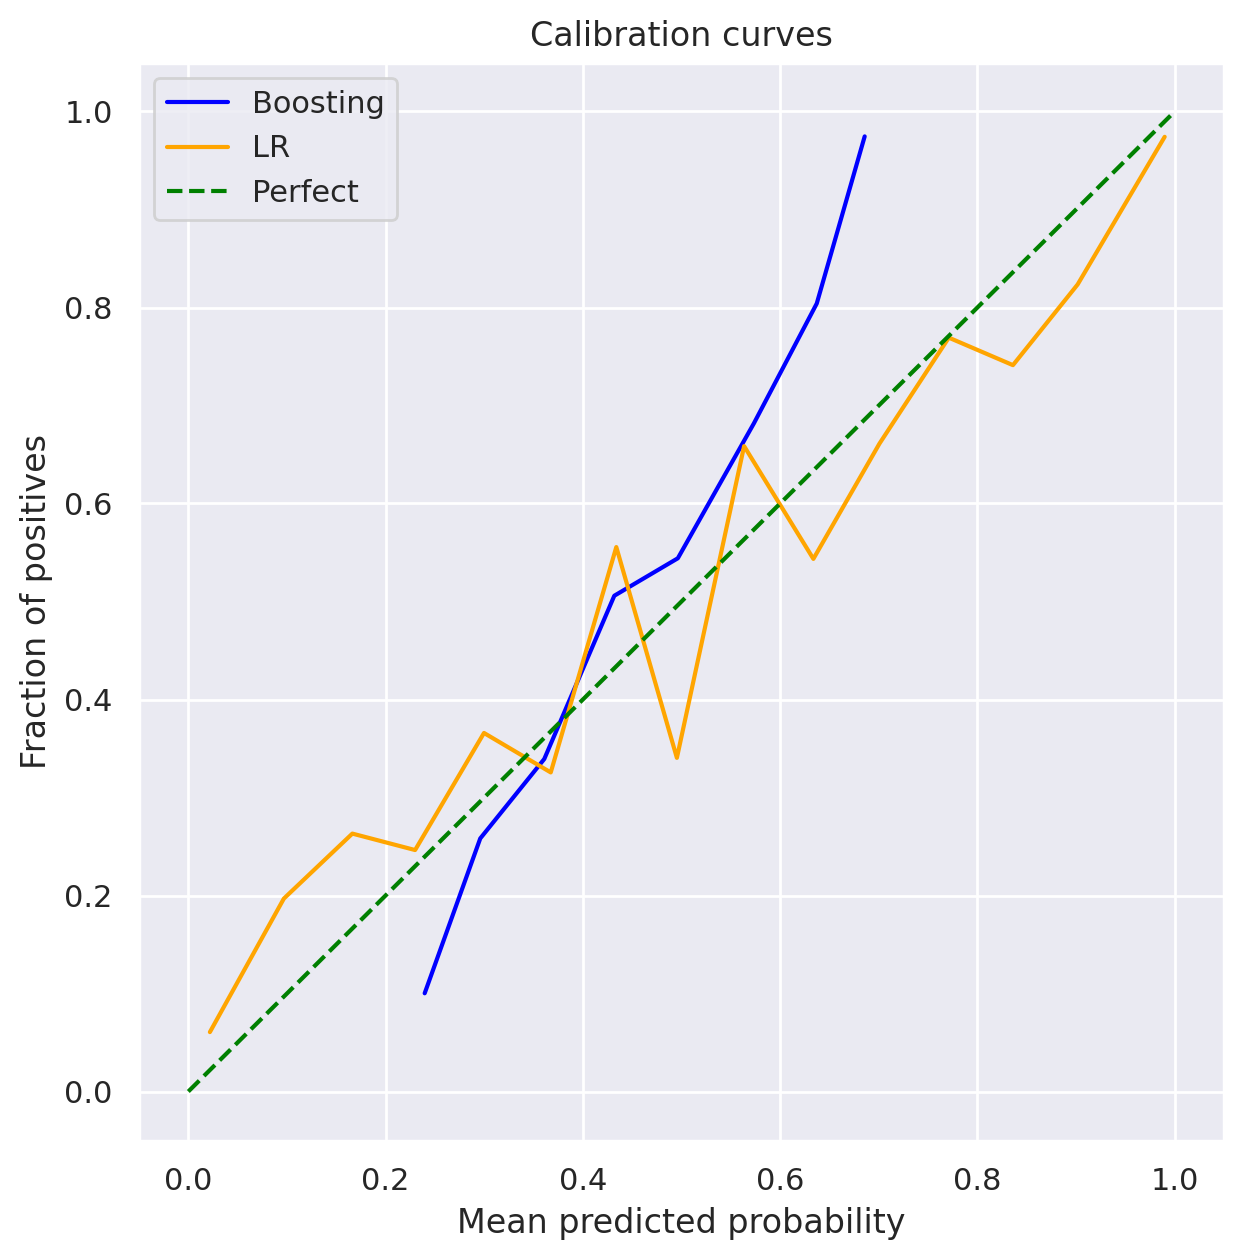

In [ ]:
from sklearn.calibration import calibration_curve

boost_pred_ = best_boosting.predict_proba(x_test)[:, 1]
lr_pred_ = lr.predict_proba(x_test)[:, 1]

plt.figure(figsize=(7, 7))

boost_true_prob, boost_pred_prob = calibration_curve(y_test, boost_pred_, n_bins=15)
lr_true_prob, lr_pred_prob = calibration_curve(y_test, lr_pred_, n_bins=15)

plt.plot(boost_pred_prob, boost_true_prob, label='Boosting', color='blue')
plt.plot(lr_pred_prob, lr_true_prob, label='LR', color='orange')
plt.plot([0, 1], [0, 1], label='Perfect', linestyle='--', color='green')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration curves')
plt.legend()
plt.show()



> Обратим внимание, что бустинг так себе оценивает вероятности (особенно в сравнении с логрегом). Для бустинга свойственна плохая оценка вероятность в крайностях (слишком маленькая уверенность и слишком большая). При средней уверенности бустинг оценивает вероятности очень хорошо, лучше логистической регрессии!



Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

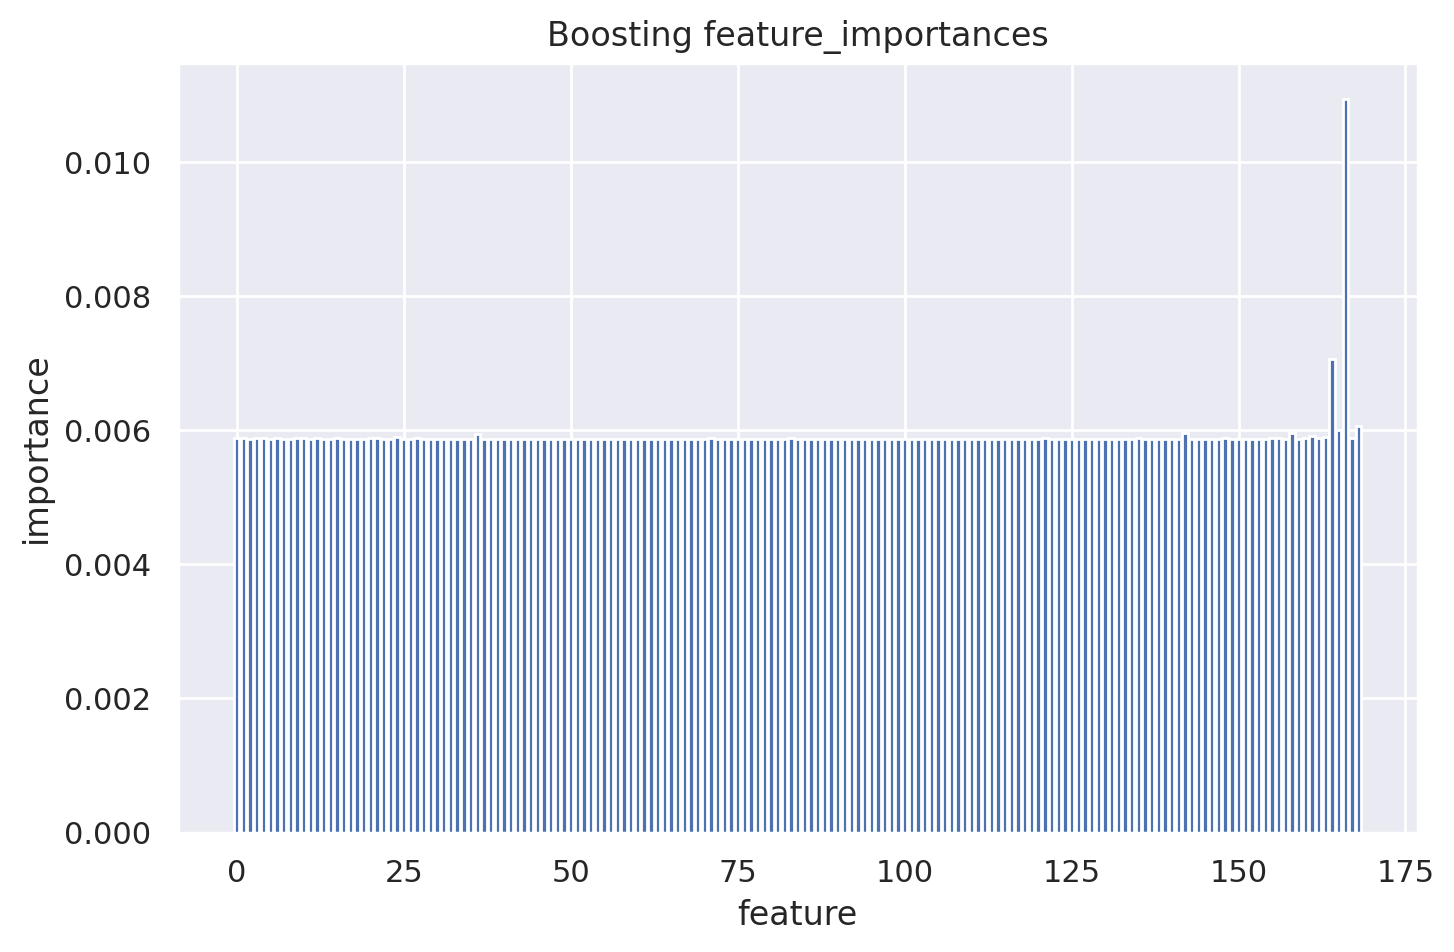

In [ ]:
f_importances = best_boosting.feature_importances_

fig, ax = plt.subplots()
ax.bar(np.arange(len(f_importances)), f_importances)

ax.set(xlabel='feature', ylabel='importance',
        title="Boosting feature_importances")
plt.show()

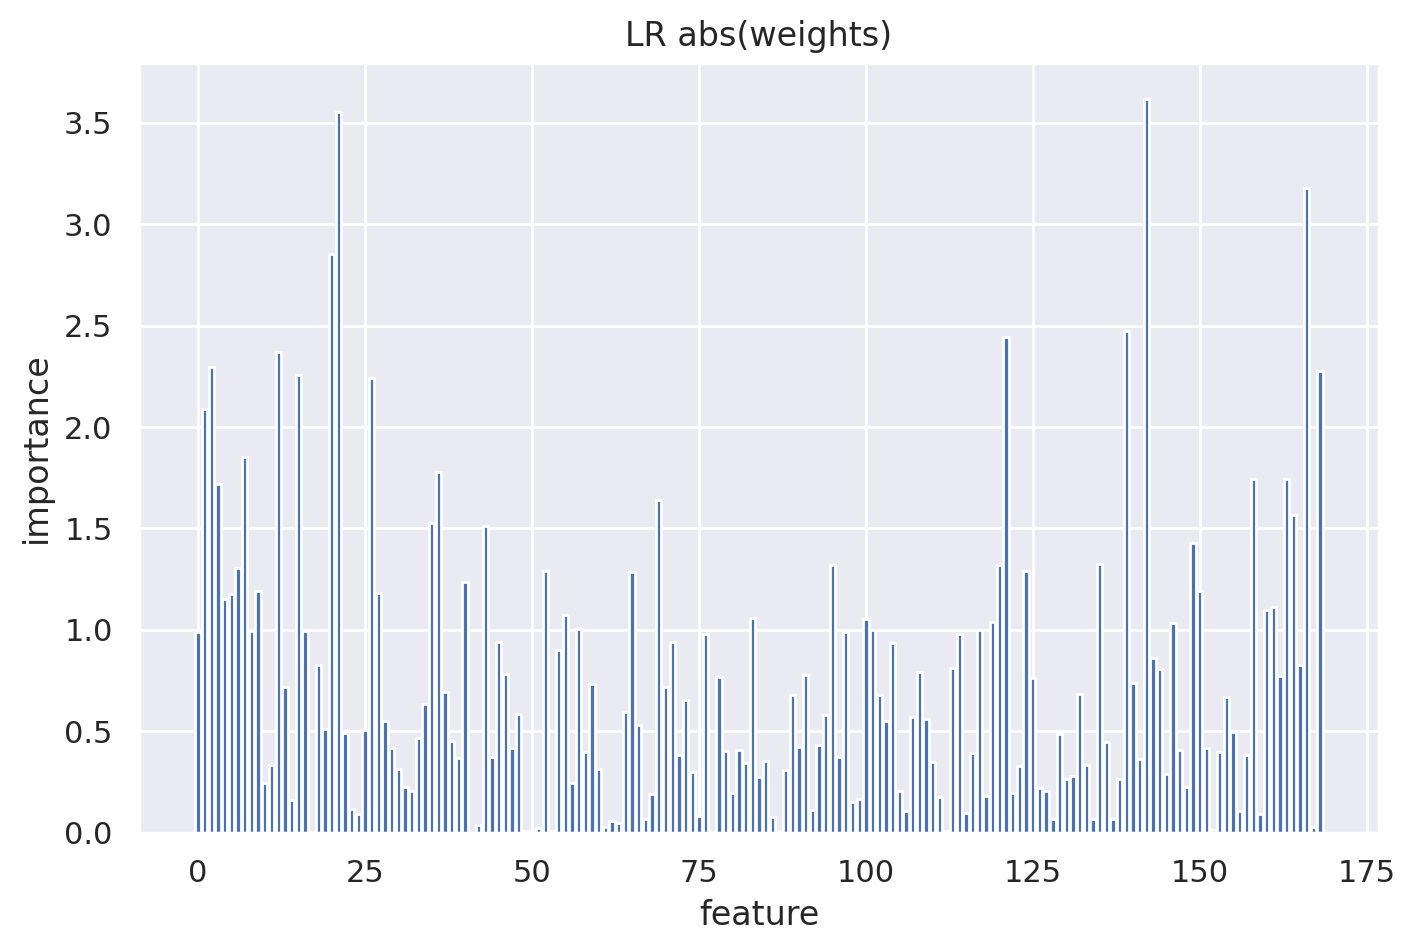

In [ ]:
f_importances_lr = np.abs(lr.coef_[0])

fig, ax = plt.subplots()
ax.bar(np.arange(len(f_importances_lr)), f_importances_lr)

ax.set(xlabel='feature', ylabel='importance',
        title="LR abs(weights)")
plt.show()



> Определенно мое дерево хуже выделяет признаки, хотя и выделяет. Относительно обоих графиков хочется попробовать отсечь в бустинге те признаки, для которых feature_importances_ > 0.00588 (почти жквиваленто отсеиванию наиважнейших признаков для лог рега)



Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
feature_mask = f_importances > 0.00588

In [ ]:
config = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_leaf': study.best_params['leaves']
}

filtered_best_boosting = Boosting(
    base_model_params=config,
    learning_rate=study.best_params['lr'],
    n_estimators=study.best_params['n_estimators'],
    subsample=study.best_params['subsample'],
    early_stopping_rounds=study.best_params['esr']
)
filtered_best_boosting.fit(x_train[:, feature_mask], y_train, x_valid[:, feature_mask], y_valid)

In [ ]:
print(f'Score for filtered boosting = {filtered_best_boosting.score(x_test[:, feature_mask], y_test)}')

Score for filtered boosting = 0.9325630625878766


Все еще хуже лучшего варианта со всеми фичами :(

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
# про блендинг читала тут https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/

config = {
    'max_depth': study.best_params['max_depth'],
    'min_samples_leaf': study.best_params['leaves']
}

best_boosting = Boosting(
    base_model_params=config,
    learning_rate=study.best_params['lr'],
    n_estimators=study.best_params['n_estimators'],
    subsample=study.best_params['subsample'],
    early_stopping_rounds=study.best_params['esr']
)

x_new_train, x_new_val, y_new_train, y_new_val = train_test_split(x_train, y_train, test_size=0.3, random_state=1337)

# train boosting & lr on train split
best_boosting.fit(x_new_train, y_new_train, x_new_val, y_new_val)
lr = LogisticRegression(max_iter=100000).fit(x_train, y_train)

# prediction of boosting & lr on val and test split
val_pred_boost = best_boosting.predict_proba(x_valid)[:, 1]
test_pred_boost = best_boosting.predict_proba(x_test)[:, 1]
val_pred_lr = lr.predict_proba(x_valid)[:, 1]
test_pred_lr = lr.predict_proba(x_test)[:, 1]

# blending
val_split = np.concatenate([val_pred_boost, val_pred_lr]).reshape(-1, 1)
val_y = np.concatenate([y_valid, y_valid])
test_split = np.concatenate([test_pred_boost, test_pred_lr]).reshape(-1, 1)
test_y = np.concatenate([y_test, y_test])

meta_lr = LogisticRegression(max_iter=100000).fit(val_split, val_y)

print("Meta score =", roc_auc_score(test_y == 1, meta_lr.predict_proba(test_split)[:, 1]))

Meta score = 0.9155077048067854


Качетсво не улучшилось, скорее всего это связано с тем, что при блендинге не используется весь объем выборки для обучения

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool


catboost = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
catboost.fit(x_train, y_train)
preds_proba = catboost.predict_proba(x_test)[:, 1]

print("Score =", roc_auc_score(y_test == 1, preds_proba))

0:	learn: 0.3802937	total: 14.5ms	remaining: 14.5ms
1:	learn: 0.3460453	total: 32.2ms	remaining: 0us
Score = 0.8939366862796655


## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

от 2024 хотелось бы дождаться путешествий и новых эмоций, меньше домашек работы и курсача. Го уже все отдыхать

[@cocosinca](@cocosinca) с наступающим!! Спасибо за проверки дз 🥰🥰🥰

---



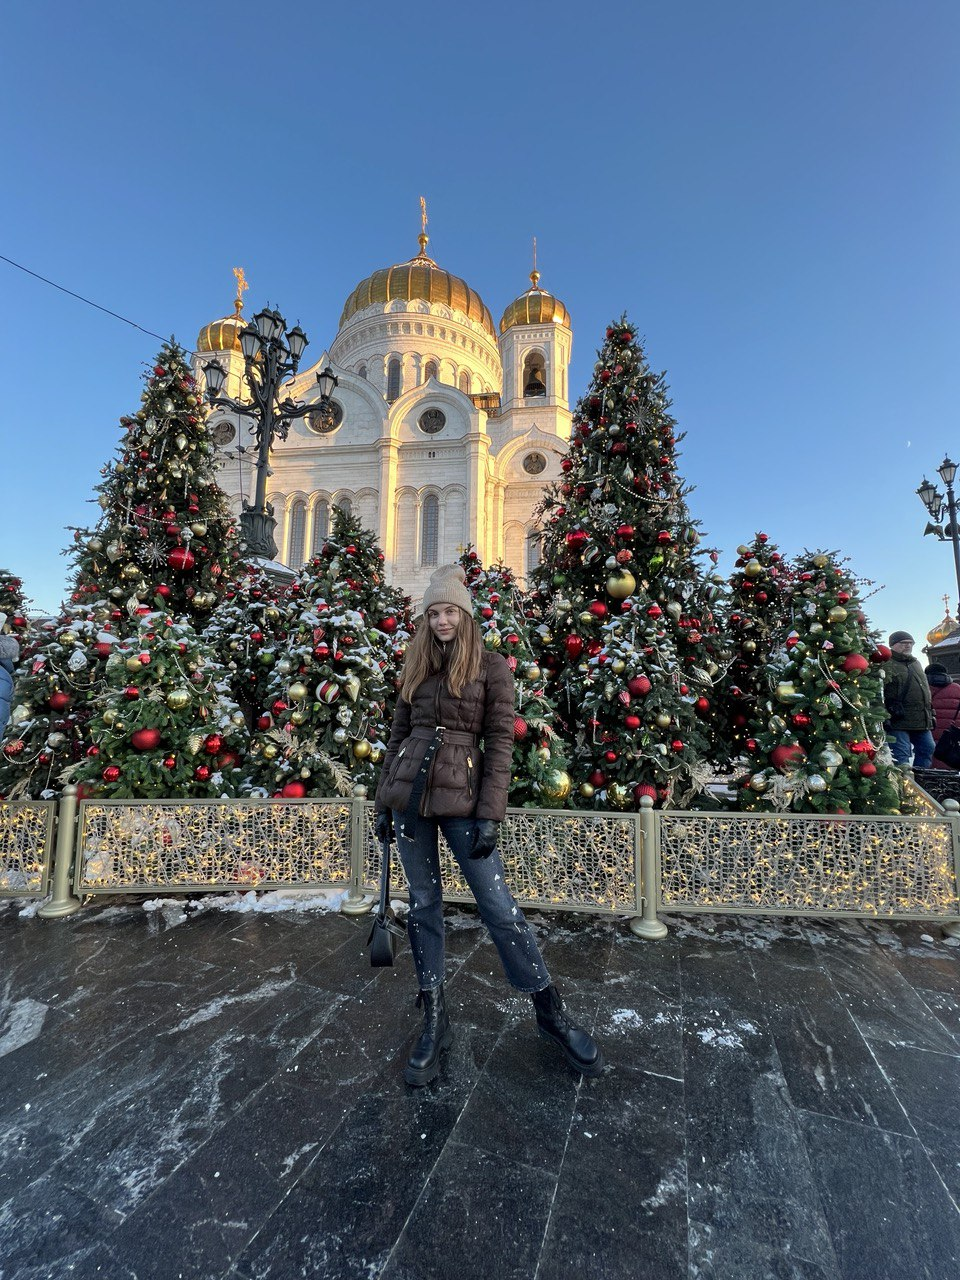